### `Vader Sentiment Analysis`
This jupyter notebook contains sentiment analysis based on the tweets. Each tweet is analysed by a sentiment analyzer tool called [vaderSentiment](https://github.com/cjhutto/vaderSentiment), which provides `positive`, `negative` and `neutral` scores based on its input context. 

These scores are ratios for proportions of text that fall in each category. Additionally, it provides `compound` metric which provides a unidimensional measure of sentiment for a given sentence.

In this notebook, `compound` score is used to classify the tweets whether it's `positive` or `negative`. The `positive` threshold is determined as `0.05` and abobe. Tweets less than this threshold are evaluated as `negative`.



In [1]:
import pandas as pd
import numpy as np
import nltk
import os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
analyzer = SentimentIntensityAnalyzer()

In [2]:
df1 = pd.read_csv("../data/tweets.csv")

In [3]:
df1.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,likes_count,hashtags,cashtags,link,retweet,quote_url,video,user_rt_id,near,geo
0,1151347096966041603,1151347096966041603,1563337513000,2019-07-16,21:25:13,PDT,68141680,paulsonmyheart,wit ☾ h♥️,NaN,...,0,[],[],https://twitter.com/PaulsonMyHeart/status/1151...,NaN,NaN,0,NaN,NaN,NaN
1,1151347069627576320,1150980638247231489,1563337507000,2019-07-16,21:25:07,PDT,1125157678957907970,gaymiyas,robin,NaN,...,0,[],[],https://twitter.com/gaymiyas/status/1151347069...,NaN,NaN,0,NaN,NaN,NaN
2,1151347066255396865,1151347066255396865,1563337506000,2019-07-16,21:25:06,PDT,988965488918253568,authornesiewing,Author Nesi Ewing,NaN,...,0,"['#depression', '#uncoveringthenewu', '#change...",[],https://twitter.com/AuthorNesiEwing/status/115...,NaN,NaN,0,NaN,NaN,NaN
3,1151347022789611520,1151343977267892225,1563337495000,2019-07-16,21:24:55,PDT,794267753179992064,sebsmish,andaluna 🌙,NaN,...,0,[],[],https://twitter.com/sebsmish/status/1151347022...,NaN,NaN,0,NaN,NaN,NaN
4,1151347006406893568,1151347006406893568,1563337491000,2019-07-16,21:24:51,PDT,1121246242401660928,gbrrants,femme brulee 2,NaN,...,0,[],[],https://twitter.com/gbrrants/status/1151347006...,NaN,NaN,0,NaN,NaN,NaN


In [4]:
df_new = df1.copy()

In [5]:
df_new.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'user_rt_id',
       'near', 'geo'],
      dtype='object')

In [6]:
df_new = df_new.loc[:, ['cashtags', 'hashtags', 'id', 'time', 'tweet', 'link']]
#df_new['clean_tweet'] = df_new['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords])) 

In [7]:
df_new.head()

,cashtags,hashtags,id,time,tweet,link
0,[],[],1151347096966041603,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",https://twitter.com/PaulsonMyHeart/status/1151...
1,[],[],1151347069627576320,21:25:07,what part of this was really harmfult of a lot...,https://twitter.com/gaymiyas/status/1151347069...
2,[],"['#depression', '#uncoveringthenewu', '#change...",1151347066255396865,21:25:06,one of the ways I got through my #depression i...,https://twitter.com/AuthorNesiEwing/status/115...
3,[],[],1151347022789611520,21:24:55,see i wanna do one of them but they all say th...,https://twitter.com/sebsmish/status/1151347022...
4,[],[],1151347006406893568,21:24:51,IS IT clinical depression or is it the palpabl...,https://twitter.com/gbrrants/status/1151347006...


In [8]:
df_new['vader_score'] = df_new['tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [9]:
df_new.head()

,cashtags,hashtags,id,time,tweet,link,vader_score
0,[],[],1151347096966041603,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",https://twitter.com/PaulsonMyHeart/status/1151...,-0.2699
1,[],[],1151347069627576320,21:25:07,what part of this was really harmfult of a lot...,https://twitter.com/gaymiyas/status/1151347069...,-0.5995
2,[],"['#depression', '#uncoveringthenewu', '#change...",1151347066255396865,21:25:06,one of the ways I got through my #depression i...,https://twitter.com/AuthorNesiEwing/status/115...,0.3382
3,[],[],1151347022789611520,21:24:55,see i wanna do one of them but they all say th...,https://twitter.com/sebsmish/status/1151347022...,-0.8643
4,[],[],1151347006406893568,21:24:51,IS IT clinical depression or is it the palpabl...,https://twitter.com/gbrrants/status/1151347006...,-0.8316


In [10]:
df_new['vader_sentiment_label']= df_new['vader_score'].map(lambda x:int(1) if x>=0.0 else int(0))

In [11]:
df_new.head()

,cashtags,hashtags,id,time,tweet,link,vader_score,vader_sentiment_label
0,[],[],1151347096966041603,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",https://twitter.com/PaulsonMyHeart/status/1151...,-0.2699,0
1,[],[],1151347069627576320,21:25:07,what part of this was really harmfult of a lot...,https://twitter.com/gaymiyas/status/1151347069...,-0.5995,0
2,[],"['#depression', '#uncoveringthenewu', '#change...",1151347066255396865,21:25:06,one of the ways I got through my #depression i...,https://twitter.com/AuthorNesiEwing/status/115...,0.3382,1
3,[],[],1151347022789611520,21:24:55,see i wanna do one of them but they all say th...,https://twitter.com/sebsmish/status/1151347022...,-0.8643,0
4,[],[],1151347006406893568,21:24:51,IS IT clinical depression or is it the palpabl...,https://twitter.com/gbrrants/status/1151347006...,-0.8316,0


In [12]:
positive_num = len(df_new[df_new['vader_score'] >=0.0])
negative_num = len(df_new[df_new['vader_score']<0.0])

#positive_num,neutral_num, negative_num
positive_num, negative_num

(6050, 18812)

In [13]:
df_new.drop(['id', 'time'], axis = 1, inplace = True)
df_new = df_new[['vader_sentiment_label', 'vader_score', 'tweet']]

In [14]:
df_new.head()

,vader_sentiment_label,vader_score,tweet
0,0,-0.2699,"Wow, my dad yday: “you don’t take those stupid..."
1,0,-0.5995,what part of this was really harmfult of a lot...
2,1,0.3382,one of the ways I got through my #depression i...
3,0,-0.8643,see i wanna do one of them but they all say th...
4,0,-0.8316,IS IT clinical depression or is it the palpabl...


In [15]:
df_new.to_csv('../data/vader_processed.csv')

In [16]:
non_depressive_tweets = df_new.loc[df_new['vader_sentiment_label'] == 1]['tweet']
depressive_tweets = df_new.loc[df_new['vader_sentiment_label'] == 0]['tweet']

In [31]:
import matplotlib.pyplot as plt

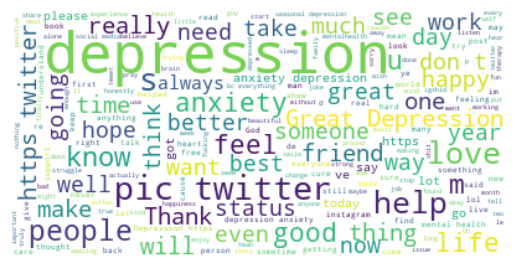

In [32]:
non_depressive_test = " ".join(tweet for tweet in non_depressive_tweets)
depressive_test = " ".join(tweet for tweet in depressive_tweets)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(non_depressive_test)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


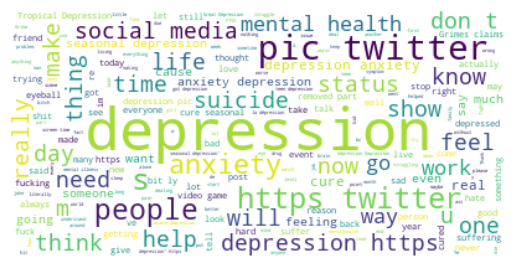

In [33]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(depressive_test)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
